<h1>PROJECT 464</h1>

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
# Display plots inside Notebook
%matplotlib inline

In [3]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

<h1>Dataset 1</h1>

In [4]:
#SpreadSheet Datafile name
file = 'Datasets.xlsx'

#Load spreadsheet
data = pd.read_excel(file)

#Load Dataset 1 into DataFrame
ds1 = pd.read_excel(file, sheet_names = 'Dataset 1', index_col=0)

<h2>Filling missing values and Normalization</h2>

In [5]:
ds1.fillna(ds1.median(), inplace=True)
min_max_scaler = preprocessing.MinMaxScaler()
ds1[ds1.columns[5:90]] = min_max_scaler.fit_transform(ds1[ds1.columns[5:90]])
ds1_normalized = pd.DataFrame(ds1)
ds1_normalized.head()

,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,BA,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
Athlete,,,,,,,,,,,,,,,,,,,,,
1,36,5.0,1,7,13.0,0.894737,0.857143,0.875,0.584098,0.582996,...,0.95,0.827586,1.000000,0.80,1.000000,0.717413,0.733333,0.666667,0.875,0.857143
2,50,5.0,1,7,13.0,1.000000,0.914286,1.000,0.576394,0.582996,...,0.95,0.620690,0.733333,0.56,1.000000,0.717413,0.733333,0.722222,0.875,0.857143
3,41,5.0,1,7,13.0,0.894737,0.714286,0.750,0.564839,0.582996,...,0.95,0.758621,0.766667,0.72,1.000000,0.717413,0.666667,0.861111,0.875,0.857143
4,60,1.0,1,10,29.0,0.947368,0.571429,0.875,0.706530,0.757085,...,0.95,0.655172,0.666667,0.60,0.978947,0.767740,0.166667,1.000000,0.875,1.000000
5,22,1.0,1,10,29.0,0.947368,0.857143,0.750,0.668012,0.757085,...,0.95,0.137931,0.000000,0.60,0.978947,0.767740,0.833333,0.638889,0.750,0.942857


<h1>PLOTS</h1>

<h2>OO wrt HeadCoach</h2>

OO wrt HeadCoach
“OO”: performance metric, continuous data.

“Head Coach”: metadata, categorical.

Violin plot superposed with box plot.

The violin plot shows the relationship between the athlete’s head coach and the performance metric OO, per Season.

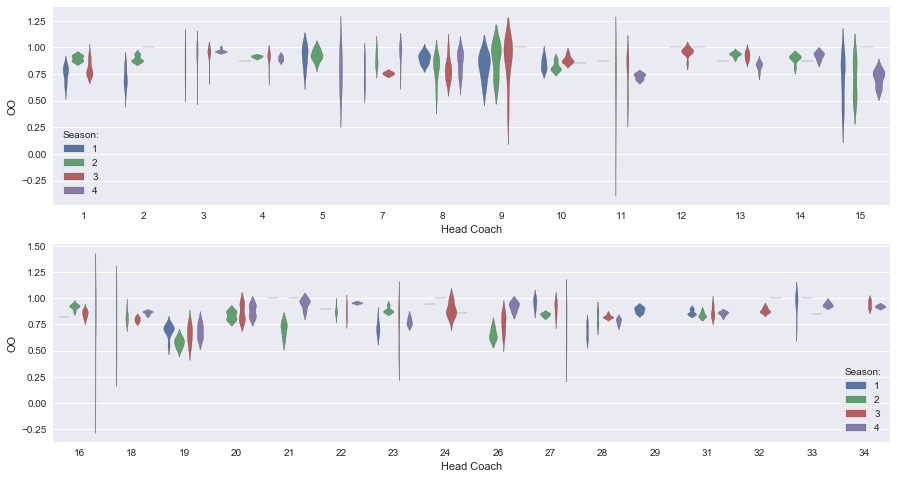

In [81]:
plt.figure(figsize=(15,8))
plt.subplot(211)
sns.violinplot(x='Head Coach', y='OO', data=ds1[ds1['Head Coach'] < 16], inner=None, hue='Season', linewidth=0.3, legend=False)
plt.legend(loc='lower left', title='Season:')
plt.subplot(212)
sns.violinplot(x='Head Coach', y='OO', data=ds1[ds1['Head Coach'] > 15], inner=None, hue='Season', linewidth=0.3, legend=False)
plt.legend(loc='lower right', title='Season:')

<h2> S wrt Manager and Season </h2>

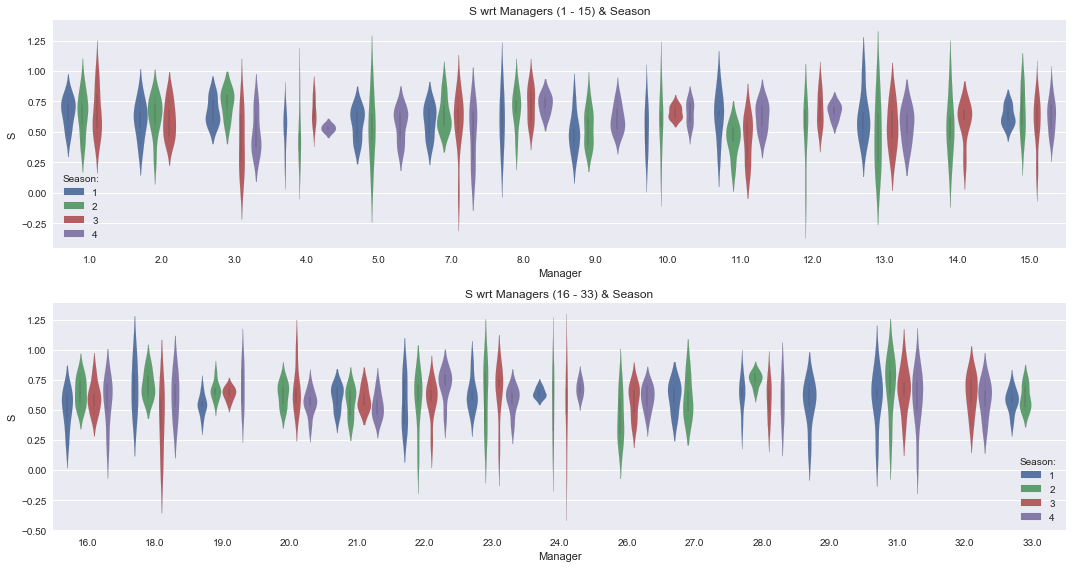

In [91]:
plt.figure(figsize=(15,8))

plt.subplot(211)
plt.title("S wrt Managers (1 - 15) & Season")
sns.violinplot(x='Manager', y='S', data=ds1[(ds1.Manager < 16)], hue='Season', linewidth=0.1, legend=False)
plt.legend(loc='lower left', title='Season:')

plt.subplot(212)
plt.title("S wrt Managers (16 - 33) & Season")
sns.violinplot(x='Manager', y='S', data=ds1[(ds1.Manager > 15)], hue='Season', linewidth=0.1, legend=False)
plt.legend(loc='lower right', title='Season:')

# Adjust spaces between subplots
plt.tight_layout()

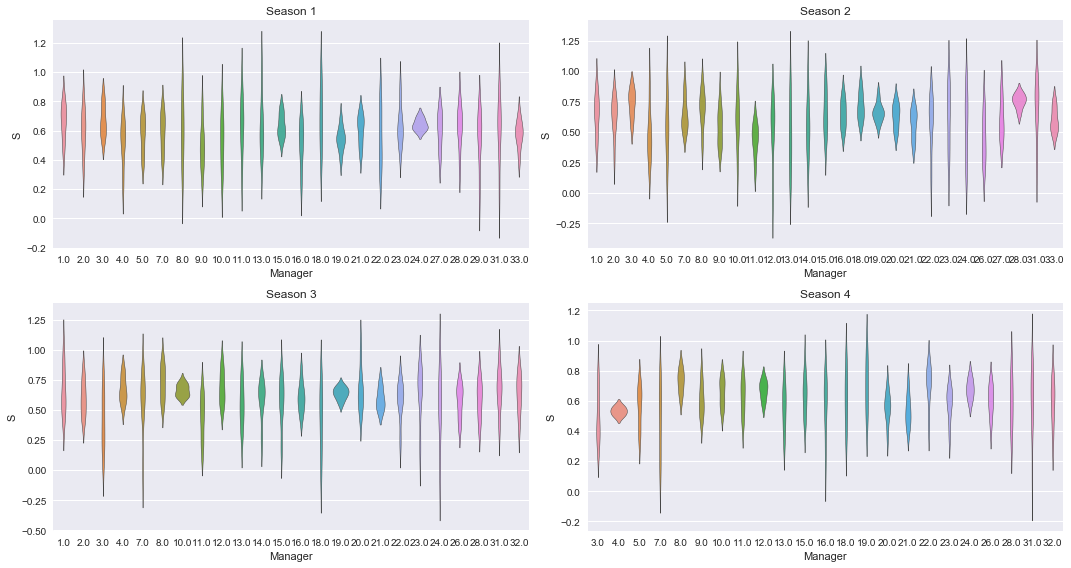

In [93]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title("Season 1")
sns.violinplot(x='Manager', y='S', data=ds1[ds1.Season==1], inner=None, linewidth=0.5)

plt.subplot(2,2,2)
plt.title("Season 2")
sns.violinplot(x='Manager', y='S', data=ds1[ds1.Season==2], inner=None, linewidth=0.5)

plt.subplot(2,2,3)
plt.title("Season 3")
sns.violinplot(x='Manager', y='S', data=ds1[ds1.Season==3], inner=None, linewidth=0.5)

plt.subplot(2,2,4)
plt.title("Season 4")
sns.violinplot(x='Manager', y='S', data=ds1[ds1.Season==4], inner=None, linewidth=0.5)

plt.tight_layout()

<h2>R wrt HeadCoach and Season</h2>

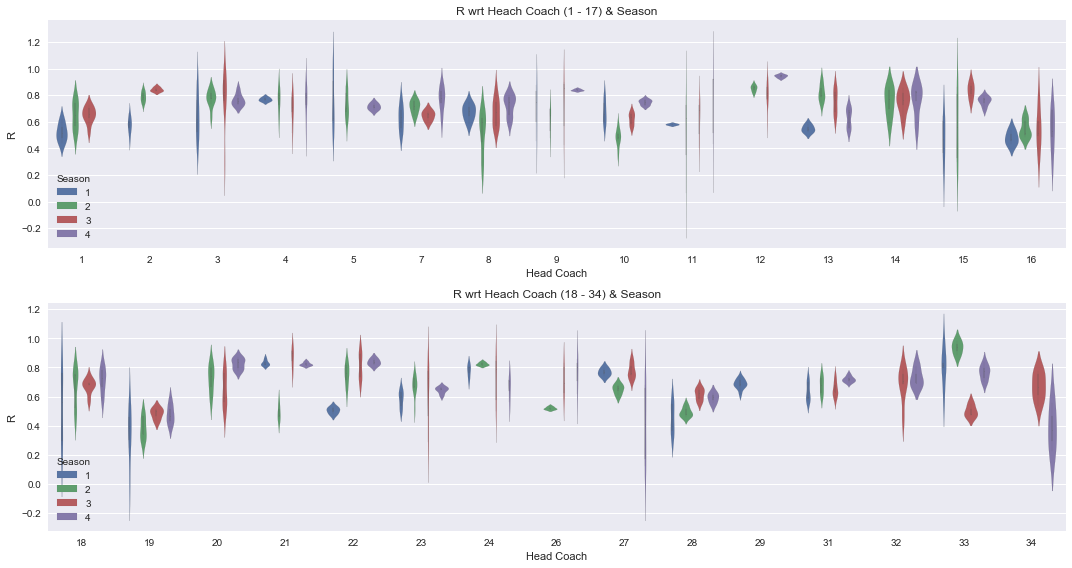

In [98]:
plt.figure(figsize=(15,8))

plt.subplot(211)
sns.violinplot(x='Head Coach', y='R', data=ds1[ds1['Head Coach'] < 18], linewidth=0.1, hue='Season')
plt.title('R wrt Heach Coach (1 - 17) & Season')
plt.legend(loc='lower left', title='Season')

plt.subplot(212)
sns.violinplot(x='Head Coach', y='R', data=ds1[ds1['Head Coach'] > 17], linewidth=0.1, hue='Season')
plt.title('R wrt Heach Coach (18 - 34) & Season')
plt.legend(loc='lower left', title='Season')

plt.tight_layout()

<h2>NN wrt OO and Season</h2>

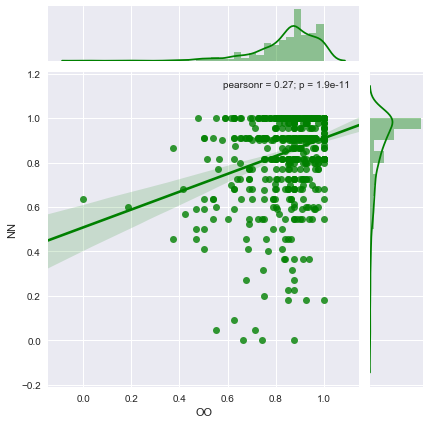

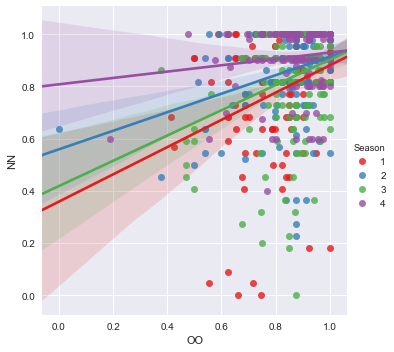

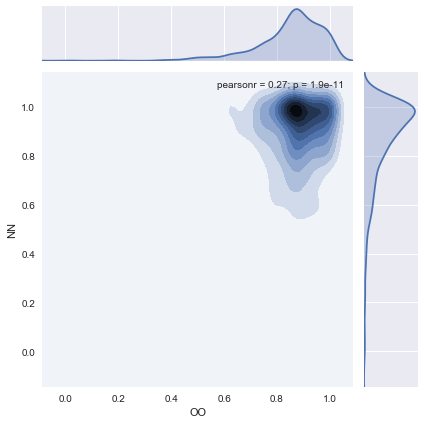

In [68]:
#
sns.jointplot(x='OO', y='NN', data=ds1,color='g', kind='reg')

#To visualise all 4 regression lines on one graph
sns.lmplot(x='OO', y='NN', data=ds1, hue='Season', palette='Set1')

# To locate where most of data is focused
sns.jointplot(x='OO', y='NN', data=ds1, palette='Set1', kind='kde')

Analysis: Pearson's r measures the linear correlation between our two continuous variables OO and NN.

If r close to 1: there is a strong relationship (correlation) between the two variables.

If r close to 0: weak relationship between the variables, so changes in one variable are not correlated with changes in second variable.

If r > 0: as one variable increases (decreases) in value, the second increases (decreases) as well.

All 4 regression lines have close r coefficients in the interval [0.12,0.3]. The coefficient is positive for all seasons, so the higher the OO, the higher the NN. However, r is relatively low, so the relationship between NN and OO is moderate.

All 4 regression lines seem to intersect at (1,0.9), we can use KDE to show that most points are concentrated around that area (check the last graph).

<h2>OO wrt JI and Season</h2>

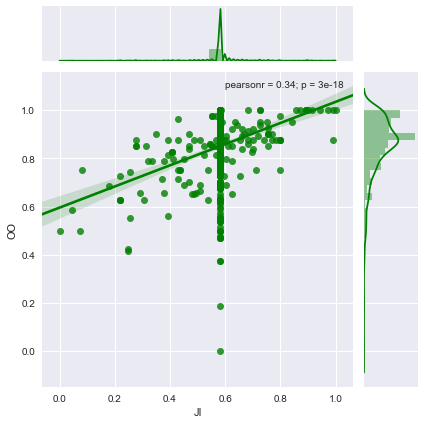

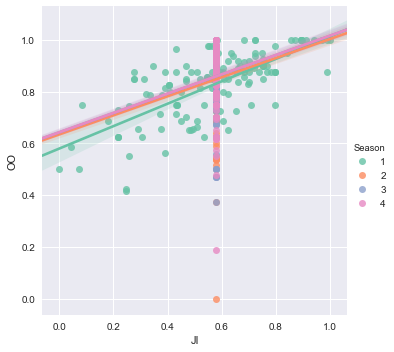

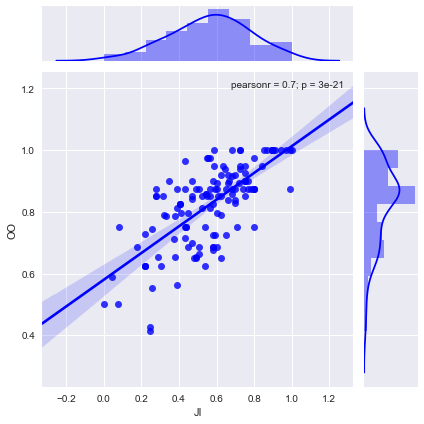

In [101]:
# OO wrt JI and Season
# We could simply show the pearsonr on the second graph without calling a jointplot
sns.jointplot(x='JI', y='OO', data=ds1, color='g', kind='reg')
sns.lmplot(x='JI', y='OO', data=ds1, palette='Set2', hue='Season')
sns.jointplot(x='JI', y='OO', data=ds1[ds1.Season==1], color='b', kind='reg')

Analysis:

For all season combined (First graph): r = 0.34, moderate correlation between OO and JI

Season 1: r = 0.7, relatively high level of correlation.

Season 2, 3, 4: r = 0, no correlation at all.

JI and OO are correlated only during Season 1. During the rest of the seasons, there is no relationship between JI and OO.

<h2>HG wrt Y and Season</h2>

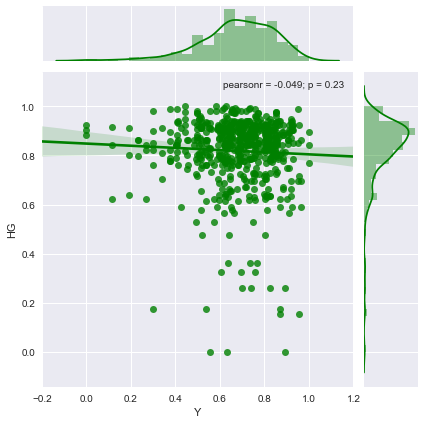

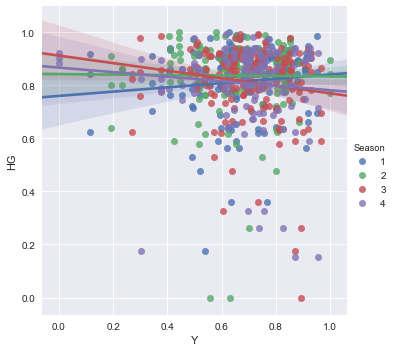

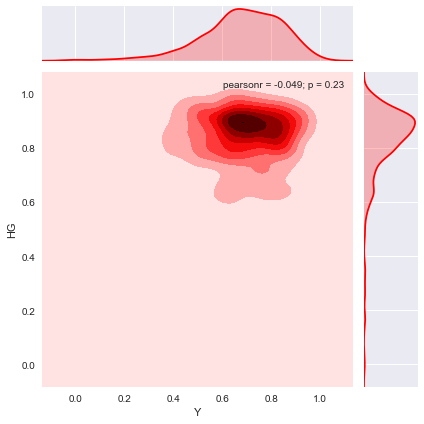

In [74]:
# HG wrt Y and Season
sns.jointplot(x='Y', y='HG', data=ds1, color='g', kind='reg')
sns.lmplot(x='Y', y='HG', data=ds1, hue='Season')
sns.jointplot(x='Y', y='HG', data=ds1, color='r', kind='kde')

Analysis:

r = -0.049, indicating no correlation between OO and Y

However, according to the kde plot (last graph), most of the data is focused between x = 0.8 - 1.0 and y = 0.6 - 0.8.

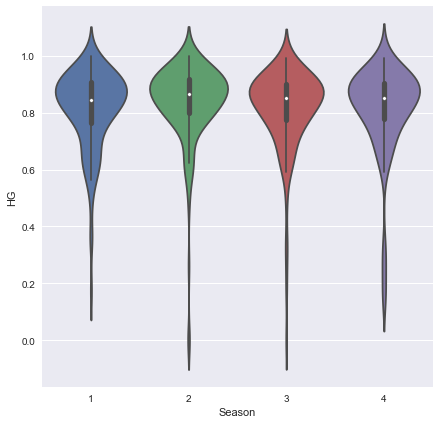

In [169]:
# HG wrt Season# HG wrt  
plt.figure(figsize=(7,7))
sns.violinplot(x='Season', y='HG', data=ds1)

Analysis: point out that throughout the seasons, HG varies little. The median is approximately the same, the distribution as well. (Btw how does 2 & 3 have a negative value for minimum???) because we have negative values, and maybe our normalization didnt take that into account?

<h2>B wrt League/Division and Season</h2>

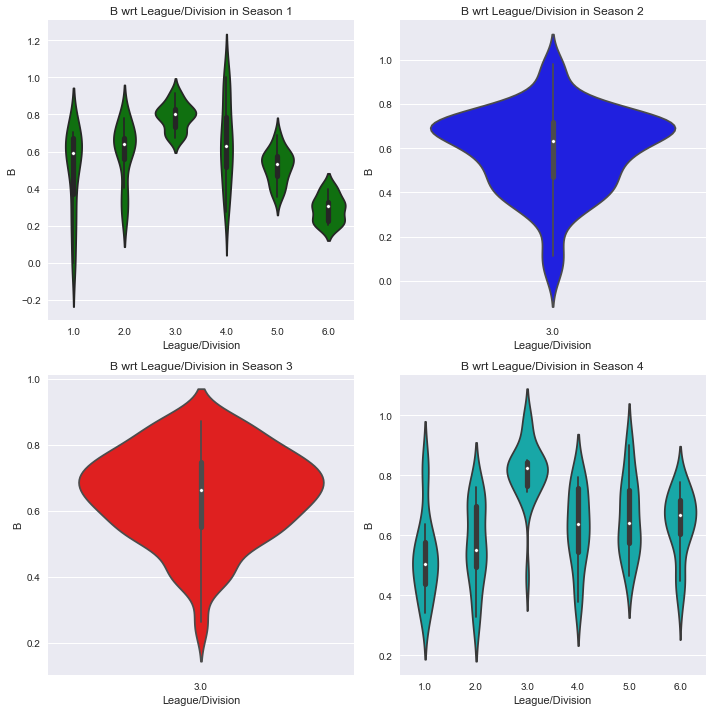

In [108]:
#B wrt League/Division and Season
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(221)
plt.title("B wrt League/Division in Season 1")

ax2 = fig.add_subplot(222)
plt.title("B wrt League/Division in Season 2")

ax3 = fig.add_subplot(223)
plt.title("B wrt League/Division in Season 3")

ax4 = fig.add_subplot(224)
plt.title("B wrt League/Division in Season 4")


sns.violinplot(data=ds1[ds1.Season==1], x='League/Division', y='B', ax=ax1, color='g')
sns.violinplot(data=ds1[ds1.Season==2], x='League/Division', y='B', ax=ax2, color='b')
sns.violinplot(data=ds1[ds1.Season==3], x='League/Division', y='B', ax=ax3, color='r')
sns.violinplot(data=ds1[ds1.Season==4], x='League/Division', y='B', ax=ax4, color='c')
               
plt.tight_layout()

Analysis:

Season 1: For Leagues 1, 2 and 4, the distribution is rather spread out, and the median values are close to 0.6. As for Leagues 3, 5 and 6, the median values are decreasing, and the distribution is contained.

Season 2/3: We only have data for League 3, which shows a median value almost 0.6, and a high probability distribution around 0.7.

Season 4: Only League 3 seems to have a concentrated distribution around 0.8, with the highest median value, while the other Leagues have spread out distributions with varying median values.

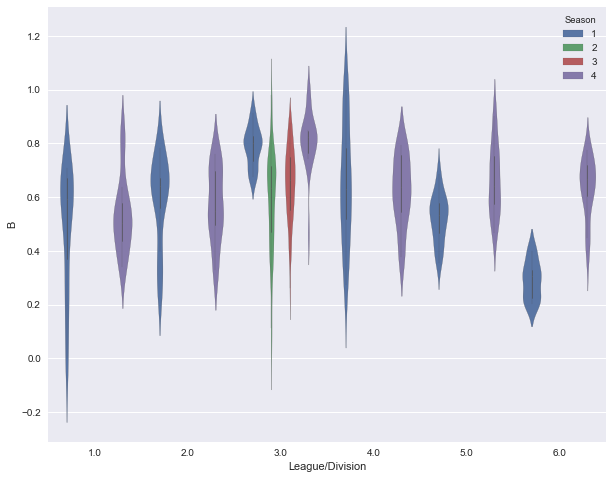

In [111]:
# Useless?
plt.figure(figsize=(10,8))
sns.violinplot(x='League/Division', y='B', data=ds1, hue='Season', linewidth=0.2)

<h1>Prediction</h1>

In [116]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn.svm import SVR

In [117]:
#Different regressor instances
regressors = [
    linear_model.LinearRegression(),
    linear_model.HuberRegressor(),
    linear_model.BayesianRidge(normalize=True),
    linear_model.Lasso(alpha=1e-4),
    linear_model.LassoLarsIC(),
    linear_model.Ridge(),
    SVR(kernel='linear'),
]

In [123]:
# Method 1 (This method is better)
def predictor1(regressors, X, y):
    cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.25, train_size=0.75, random_state=42)
    results1 = pd.DataFrame(columns=['Name', 'Train Score', 'Test Score'])
    index = 0
    for reg in regressors:
        cv_results1 = model_selection.cross_validate(reg, X, y, cv = cv_split)
        results1.loc[index, 'Name'] = reg.__class__.__name__
        results1.loc[index, 'Train Score'] = cv_results1['train_score'].mean()
        results1.loc[index, 'Test Score'] = cv_results1['test_score'].mean()
        index = index + 1
    return results1

In [165]:
# Method 2 (This could be improved upon, method taken from datacamp scikit course)
def predictor2(regressors, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    results2 = pd.DataFrame(columns=['Name', 'Train Score', 'Test Score'])
    index2 = 0

    for reg in regressors:
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)

        # Filling panda DataFrame table of results
        # rmse = np.sqrt_mean_squared_error(y_test, y_pred)
        # Decided to switch from rmse to neg_mean_squared_error but im not sure which is better
        # I need some help here hehe
        results2.loc[index2, 'Name'] = reg.__class__.__name__
        results2.loc[index2, 'Train Score'] = cross_val_score(reg, X_train, y_train, 
                                                              scoring='neg_mean_squared_error', cv=10).mean()
        results2.loc[index2, 'Test Score'] = cross_val_score(reg, X_test, y_test, 
                                                             scoring='neg_mean_squared_error', cv=10).mean()
        # results2.loc[index2, 'RMSE'] = rmse

        index2 = index2 + 1
        
    return results2

<h2>Predict feature “R” given “Head coach”, “B”, “S”, “HG”, “HH”, and “OO”</h2>

In [166]:
X1 = ds1[['B','S','HG','HH','OO']]
y1 = ds1['R']

table11 = predictor1(regressors, X1, y1)
table21 = predictor2(regressors, X1, y1)

In [167]:
table11

,Name,Train Score,Test Score
0,LinearRegression,0.704377,0.702474
1,HuberRegressor,0.700669,0.701215
2,BayesianRidge,0.704361,0.702609
3,Lasso,0.704303,0.703384
4,LassoLarsIC,0.701832,0.704847
5,Ridge,0.701277,0.701555
6,SVR,0.698617,0.696525


In [168]:
table21

,Name,Train Score,Test Score
0,LinearRegression,-0.00722543,-0.00788234
1,HuberRegressor,-0.00727349,-0.00796605
2,BayesianRidge,-0.00722479,-0.0078685
3,Lasso,-0.00721515,-0.00782882
4,LassoLarsIC,-0.00716245,-0.00770051
5,Ridge,-0.00731888,-0.00829753
6,SVR,-0.00730037,-0.00826535


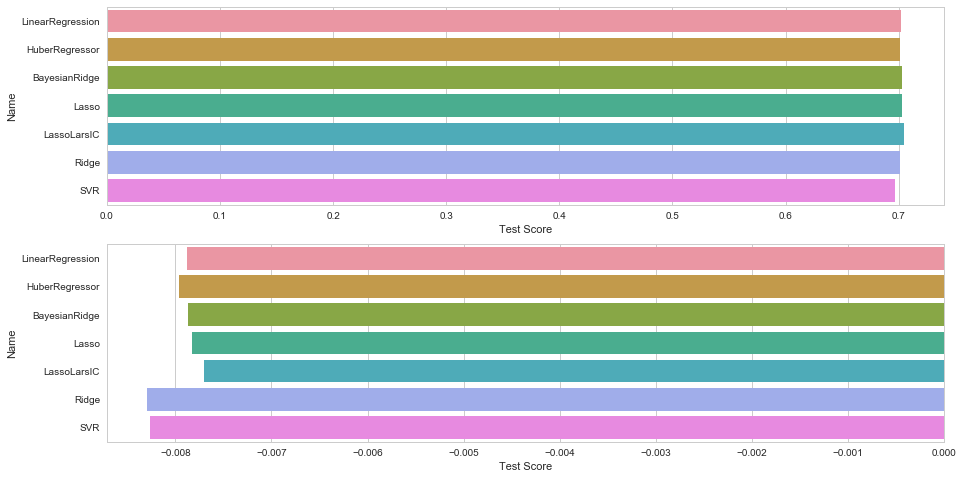

In [190]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,8))
plt.subplot(211)
sns.barplot(data=table11, y='Name', x='Test Score')
plt.subplot(212)
sns.barplot(data=table21, y='Name', x='Test Score')

<h2>Predict feature “OO” given “Head coach”, “C”, “JI”, and “NN”</h2>

In [173]:
X2 = ds1[['Head Coach','C','JI','NN']]
y2 = ds1['OO']

table12 = predictor1(regressors, X2, y2)
table22 = predictor2(regressors, X2, y2)

In [174]:
table12

,Name,Train Score,Test Score
0,LinearRegression,0.182554,0.161741
1,HuberRegressor,0.158115,0.13194
2,BayesianRidge,0.182254,0.162013
3,Lasso,0.182477,0.161747
4,LassoLarsIC,0.181868,0.161935
5,Ridge,0.17908,0.160383
6,SVR,0.176732,0.154734


In [175]:
table22

,Name,Train Score,Test Score
0,LinearRegression,-0.0137074,-0.0140028
1,HuberRegressor,-0.0139988,-0.0141555
2,BayesianRidge,-0.0136845,-0.0139485
3,Lasso,-0.013708,-0.0140013
4,LassoLarsIC,-0.0137237,-0.0137917
5,Ridge,-0.0137386,-0.0142573
6,SVR,-0.0137194,-0.013815


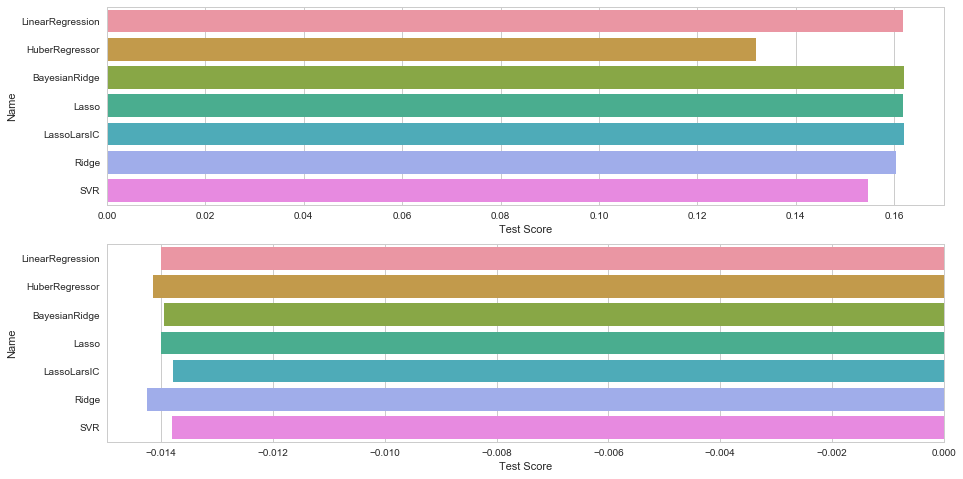

In [200]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,8))
plt.subplot(211)
sns.barplot(data=table12, y='Name', x='Test Score')
plt.subplot(212)
sns.barplot(data=table22, y='Name', x='Test Score')

<h2>Predict feature “Y” given “C”, “HG”, and “NN”</h2>

In [192]:
X3 = ds1[['C','HG','NN']]
y3 = ds1['Y']

table13 = predictor1(regressors, X3, y3)
table23 = predictor2(regressors, X3, y3)

In [193]:
table13

,Name,Train Score,Test Score
0,LinearRegression,0.0481802,0.0262114
1,HuberRegressor,0.0408306,0.0111877
2,BayesianRidge,0.047342,0.0255436
3,Lasso,0.0481498,0.0263361
4,LassoLarsIC,0.0470193,0.0256318
5,Ridge,0.0480465,0.0267907
6,SVR,0.0353751,0.00482817


In [194]:
table23

,Name,Train Score,Test Score
0,LinearRegression,-0.0228059,-0.0354762
1,HuberRegressor,-0.0230243,-0.0353272
2,BayesianRidge,-0.0227752,-0.0353789
3,Lasso,-0.0228037,-0.0354079
4,LassoLarsIC,-0.0229323,-0.0347168
5,Ridge,-0.0227667,-0.0352453
6,SVR,-0.0230528,-0.0357857


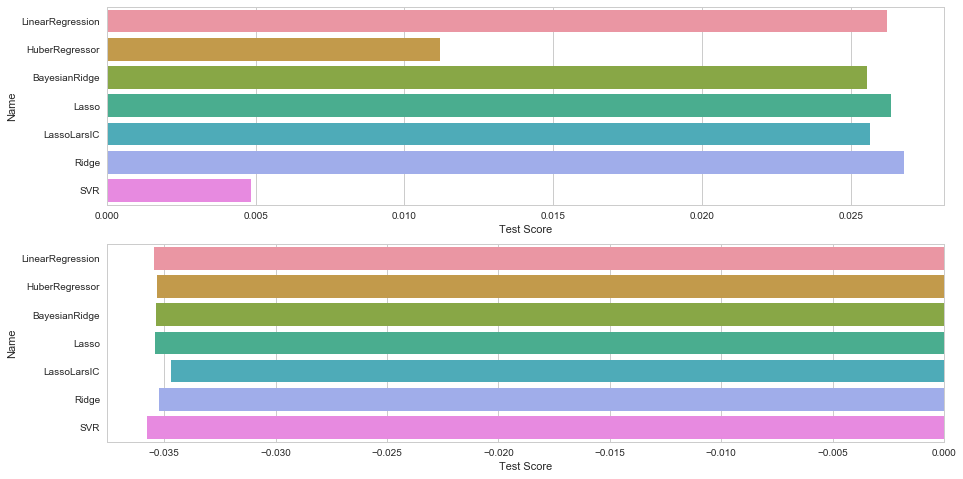

In [195]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,8))
plt.subplot(211)
sns.barplot(data=table13, y='Name', x='Test Score')
plt.subplot(212)
sns.barplot(data=table23, y='Name', x='Test Score')